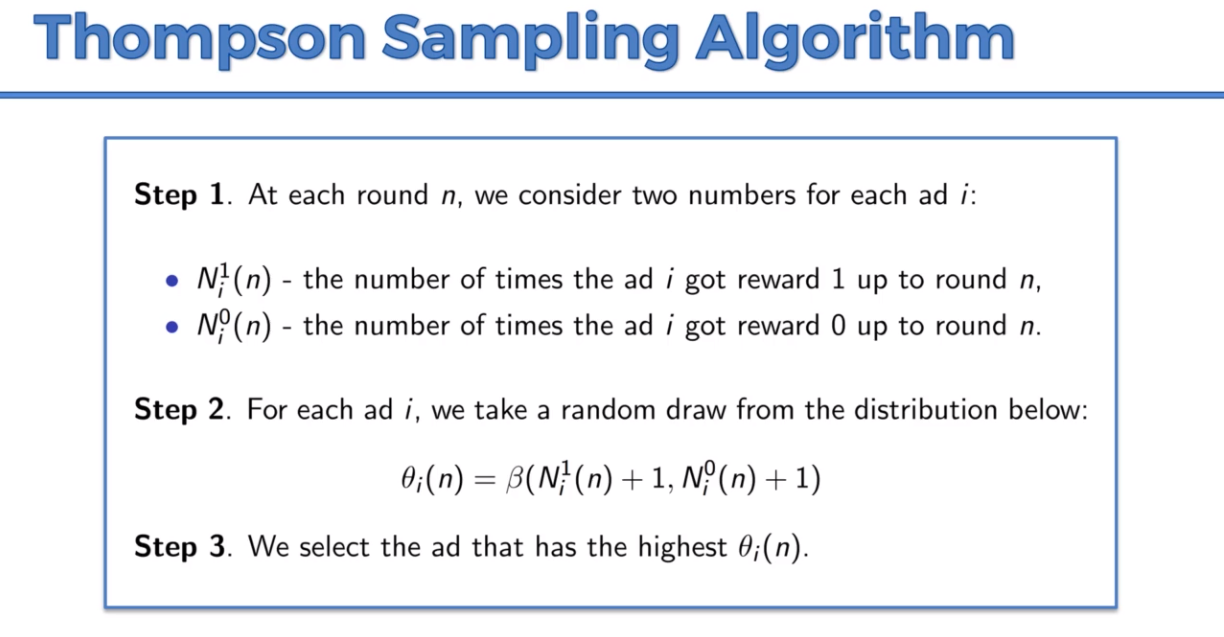

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [45]:
data = pd.read_csv('/content/Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


#**Implementing Thompson Sampling**

In [46]:
import random
N = 500
d = 10 
ads_selected = []
number_of_rewards_1 = [0]*d #positive reward
number_of_rewards_0 = [0]*d #negative reward 
total_reward = 0 
for n in range(0,N): 
  ad = 0 
  max_random = 0 #select the ad with highest theta(i)
  for i in range(0,d):
    random_beta = random.betavariate(number_of_rewards_1[i]+1,number_of_rewards_0[i]+1) #get the random draw ,step 2  
    if (random_beta > max_random):
      max_random = random_beta 
      ad = i 


#update the values 
  ads_selected.append(ad) 
  rewards = data.values[n,ad] 
  if rewards ==1: 
    number_of_rewards_1[ad]+=1
  else: 
    number_of_rewards_0[ad]+=1 
  total_reward = total_reward + rewards




##**Visualizing**

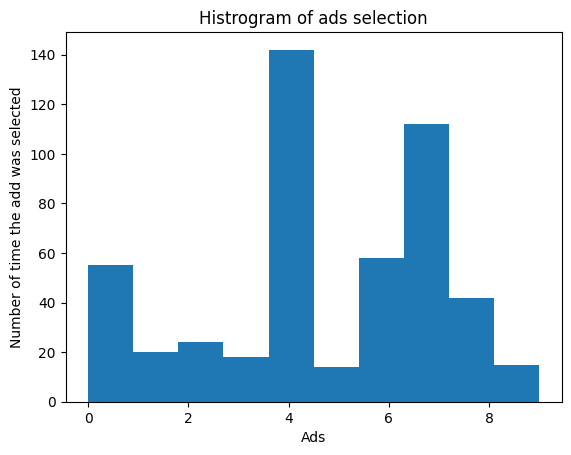

In [47]:
plt.hist(ads_selected)
plt.title('Histrogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of time the add was selected')
plt.show()